Entrega: La entrega de este examen se realizará a traves del git hub, en directorio https://github.com/hernansalinas/Metodos_Computacionales_taller/tree/main/Quiz/Entregas

El nombre del notebook deberá ser:

Apellido_Nombre_UltimosCuatroDigitosDelDocumento.ipynb

# Paracaidista en un atmosfera no uniforme.

En una atmósfera isotérmica, la variación de la presión en función de la altitud está dada por la ley de Laplace.

\begin{equation}
P=P_0 e^{-\frac{Mgy}{kT}}
\end{equation}


- $P_0=1atm$ es la presión de la atmósfera a nivel del mar
- M es el peso molecular del aire $28.8 g/mol=0.0288 kg/mol$
- g es la aceleración de la gravedad
- $k=1.3805·10^{-23}$ J/K es la constante de Boltzmann
- $T$ es la temperatura de la atmósfera en kelvin
- $NA=6.0225\times 10^23$ es el número de Avogadro, número de moléculas que caben en un mol.

Suponiendo que el aire se comporta como un gas ideal, su densidad varía con la altura de la misma forma que la presión, $\rho=\rho_0 exp(-y/\lambda)$. La densidad del aire al nivel del mar es $\rho_0=1.29 kg/m^3$ y la constante $\lambda=7482.2 m$


Las fuerzas que actuan sobre el paracaidista son:  El peso y la fuerza de fricción $f=\frac{1}{2}\rho A \delta v^2$, donde $\rho$ es la densidad que depende de la altura, A es el area de seccion trasnversal expuesta al aire  y $\delta $ es coeficiente de rozamiento. La Ecuacion diferencial de movimiento viene dada por:

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - g + \frac{A\delta}{2m} \rho v^2 
\end{equation}


\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - g + k_0v^2 exp(-y/\lambda)
\end{equation}

donde $k_0=\frac{\rho_0A\delta}{2m}$, siendo $\rho_0$ la densidad al nivel del mar.

Para la situación descrita, su tarea será elaborar un notebook de jupyter para resolver lo siguente:

1.  Elaborar una gráfica de la densidad como función de la altura.
2. Diseñar un programa que resuelva  la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros: 

- $m=60kg$, $A=0.3m^2$, $h=30km$.
- $m=60kg$, $A=0.3m^2$, $h=40km$.
- $m=60kg$, $A=0.3m^2$, $h=50km$.
- $m=60kg$, $A=0.3m^2$, $h=60km$.
- $m=60kg$, $A=0.3m^2$, $h=70km$.

3. Con la solucion de la ecuacion diferencial, elaborar una gráfica de. 
- la posición como función del tiempo.
- La velocidad como función del tiempo.
- La velocidad como función de la posición 

4. Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:

http://www.sc.ehu.es/sbweb/fisica3/fluidos/paracaidas/paracaidas_1.html



5. Realice un grafico de la velocidad maxima como función de la altura de caida.



Reto:

El modelo puede ser mejorado si se tiene presente que la aceleración de la gravedad varia según la altura.

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - \frac{GM}{(R+y)^2} + \frac{A\delta}{2m} \rho v^2 
\end{equation}

donde $G=6.67\times 10^{-11} \mathrm{Nm^2/kg}$, $M=5.98\times 10 ^{24} \mathrm{kg}$ y el radio de la Tierra es de $R=6.371\mathrm{km}$


Solucione la ecuación diferencial para este caso.





In [22]:
#Librerias

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

###***Punto 1***

Sabiendo que: $\rho=\rho_0 exp(-y/\lambda)$ y teniendo las condiciones de  $\rho_0=1.29 kg/m^3$ y la constante $\lambda=7482.2 m$
Construyo la función para luego graficarla.

<function matplotlib.pyplot.show>

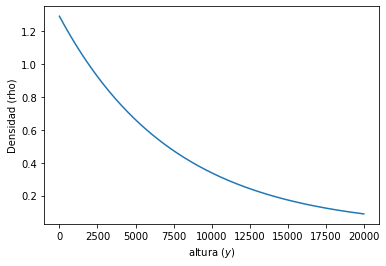

In [11]:
rho_0 = 1.29 # kg/m^3 densidad del aire a nivel del mar
lamb = 7482.2 # m Constante

y = np.linspace(0, 20000,100000)

f_rho = lambda y: rho_0*np.exp(-y/lamb)

# Gráfica
plt.plot(y, f_rho(y))
plt.xlabel('altura ($y$)')
plt.ylabel('Densidad (rho)')
plt.show

2. Diseñar un programa que resuelva  la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros: 

- $m=60kg$, $A=0.3m^2$, $h=30km$.
- $m=60kg$, $A=0.3m^2$, $h=40km$.
- $m=60kg$, $A=0.3m^2$, $h=50km$.
- $m=60kg$, $A=0.3m^2$, $h=60km$.
- $m=60kg$, $A=0.3m^2$, $h=70km$.

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - g + k_0v^2 exp(-y/\lambda)
\end{equation}

donde $k_0=\frac{\rho_0A\delta}{2m}$, siendo $\rho_0$ la densidad al nivel del mar.

In [24]:
#  Se define la función
def f(y, t, params):
  k_0 = params[0] 
  g = params[1]               
  lamb = params[2]
  
  dydt = y[1]
  dvdt = -g + (k_0*(y[1]**2))*np.exp(-y[0]/lamb)  
  return[dydt,dvdt]

In [25]:
# Condiciones iniciales constantes 
y_0 = 0 # Velocidad inicial

# Posiciones se pasan de km a m
y_1 = 30000
y_2 = 40000
y_3 = 50000
y_4 = 60000
y_5 = 70000

In [26]:
# Parametros 
m = 60 # kg
A = 0.3 # m^2
rho_0 = 1.29 # kg/m^3 
lamb = 7482.2 # m
delt = 0.8 # Tomo delta como 0.8 como lo hacen en el ejercicio del link enviado
g = 9.8 #m/s^2
t = np.linspace(0, 100, 10000) 

k_0 = (rho_0*A*delt)/(2*m)

params = [k_0, g, lamb]

In [27]:
# Lista de condiciones iniciales 
y1 = np.array([y_1, y_0])
y2 = np.array([y_2, y_0])
y3 = np.array([y_3, y_0])
y4 = np.array([y_4, y_0])
y5 = np.array([y_5, y_0])

In [29]:
x1 = odeint(f, y1, t, args=(params, ) )
x2 = odeint(f, y2, t, args=(params, ) )
x3 = odeint(f, y3, t, args=(params, ) )
x4 = odeint(f, y4, t, args=(params, ) )
x5 = odeint(f, y5, t, args=(params, ) )

In [30]:
# Obtengo las posiciones y las velocidades con respecto al tiempo
x1_pos = x1[:,0]
x1_vel = x1[:,1]

x2_pos = x2[:,0]
x2_vel = x2[:,1]

x3_pos = x3[:,0]
x3_vel = x3[:,1]

x4_pos = x4[:,0]
x4_vel = x4[:,1]

x5_pos = x5[:,0]
x5_vel = x5[:,1]

3. Con la solucion de la ecuacion diferencial, elaborar una gráfica de. 
- la posición como función del tiempo.
- La velocidad como función del tiempo.
- La velocidad como función de la posición 

gráfica de posicion en funcion del tiempo





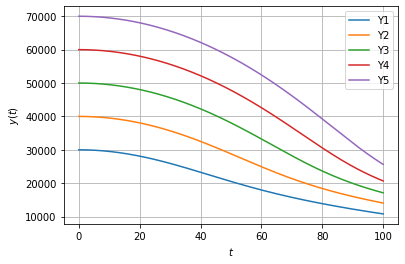



gráfica de velocidad en funcion del tiempo




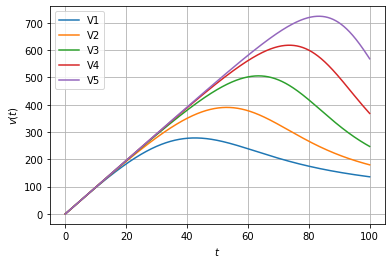



gráfica de velocidad en funcion de la posición




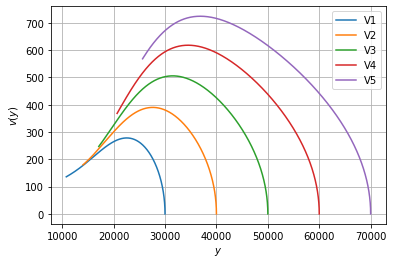

In [34]:
print('gráfica de posicion en funcion del tiempo\n')
print('\n')
plt.plot(t,x1_pos, label="Y1") 
plt.plot(t,x2_pos, label="Y2") 
plt.plot(t,x3_pos, label="Y3") 
plt.plot(t,x4_pos, label="Y4") 
plt.plot(t,x5_pos, label="Y5") 
plt.legend()
plt.xlabel("$t$")    
plt.ylabel("$y(t)$") 
plt.grid()
plt.show()

print('\n')
print('gráfica de velocidad en funcion del tiempo')
print('\n')
plt.plot(t,-x1_vel, label="V1") 
plt.plot(t,-x2_vel, label="V2") 
plt.plot(t,-x3_vel, label="V3") 
plt.plot(t,-x4_vel, label="V4") 
plt.plot(t,-x5_vel, label="V5")
plt.legend()
plt.xlabel("$t$")    
plt.ylabel("$v(t)$") 
plt.grid()
plt.show()

print('\n')
print('gráfica de velocidad en funcion de la posición')
print('\n')
plt.plot(x1_pos,-x1_vel, label="V1") 
plt.plot(x2_pos,-x2_vel, label="V2") 
plt.plot(x3_pos,-x3_vel, label="V3") 
plt.plot(x4_pos,-x4_vel, label="V4") 
plt.plot(x5_pos,-x5_vel, label="V5")
plt.legend()
plt.xlabel("$y$")    
plt.ylabel("$v(y)$") 
plt.grid()
plt.show()

4. Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:

http://www.sc.ehu.es/sbweb/fisica3/fluidos/paracaidas/paracaidas_1.html

In [49]:
vel_max = np.zeros(5)
vel_max[0] = np.amax(-x1_vel)
vel_max[1] = np.amax(-x2_vel)
vel_max[2] = np.amax(-x3_vel)
vel_max[3] = np.amax(-x4_vel)
vel_max[4] = np.amax(-x5_vel)


In [51]:
print('La velocidad máxima en y1 es:',vel_max[0].round())
print('La velocidad máxima en y2 es:',vel_max[1].round())
print('La velocidad máxima en y3 es:',vel_max[2].round())
print('La velocidad máxima en y4 es:',vel_max[3].round())
print('La velocidad máxima en y5 es:',vel_max[4].round())

La velocidad máxima en y1 es: 278.0
La velocidad máxima en y2 es: 390.0
La velocidad máxima en y3 es: 505.0
La velocidad máxima en y4 es: 618.0
La velocidad máxima en y5 es: 724.0


5. Realice un grafico de la velocidad maxima como función de la altura de caida.

In [52]:
alt = np.array([y_1, y_2, y_3, y_4, y_5])

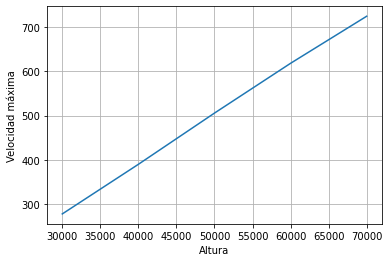

In [55]:
plt.plot(alt, vel_max)
plt.xlabel('Altura')
plt.ylabel('Velocidad máxima')
plt.grid()
plt.show()